In [92]:
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
from urllib import parse
from collections import Counter
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [93]:
#10월 08일 ~ 10월 09일

In [94]:
wordCnt = pd.read_csv('fianl1009.csv') 

In [95]:
wordCnt

,url,검색어
0,h-lecture/,개념완성 윤
1,h-vod/,개념완성 윤
2,h-material/,서울시립대
3,h-dyuna/,08강공유결합과결합의극성
4,h-study-qna/,08강공유결합과결합의극성
...,...,...
240281,h-dyuna/,주혜연
240282,h-fivemin/,주혜연
240283,h-smart-qna/,2차산맥
240284,cmp/main-relate/,통합과학 개념완성


In [96]:
#붙어있는 데이터 삭제 (붙어 있는 데이터는 검색1회로 처리하기 위해)

words = [wordCnt["검색어"][0]]

for i in range(1,len(wordCnt)):
    if words[-1] == wordCnt["검색어"][i]:
        continue
    else:
        words.append(wordCnt["검색어"][i])

In [97]:
#10월 08일 ~ 10월 09일 검색 빈도수 순위

cnt = Counter(words)
result = dict(cnt)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(100): #100위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('수능특강', 777)
2 위:  ('왕초보영어', 720)
3 위:  ('추천검색어', 703)
4 위:  ('수학', 691)
5 위:  ('ㅇ', 602)
6 위:  ('한국사', 558)
7 위:  ('수능완성', 542)
8 위:  ('영어', 538)
9 위:  ('4회 수건빙고', 529)
10 위:  ('6회 철인 삼종 그래프', 518)
11 위:  ('과학', 511)
12 위:  ('정승제', 502)
13 위:  ('뉴런', 456)
14 위:  ('국어', 437)
15 위:  ('ㅈ', 413)
16 위:  ('ㄱ', 412)
17 위:  ('ㅅ', 385)
18 위:  ('중', 374)
19 위:  ('모의고사', 370)
20 위:  ('만점왕', 342)
21 위:  ('주', 320)
22 위:  ('주혜연', 295)
23 위:  ('아름다운 디자인, 테셀레이션', 291)
24 위:  ('너에게 가장 듣고 싶은 말', 288)
25 위:  ('카타미노(중급)', 283)
26 위:  ('여', 282)
27 위:  ('건축예술로서의 보도블록', 277)
28 위:  ('6회 펜토미노가 심쿵해', 273)
29 위:  ('메시지를 확인하라', 272)
30 위:  ('역사', 266)
31 위:  ('14회 접시로 나눗셈', 264)
32 위:  ('올림포스', 263)
33 위:  ('정승익', 263)
34 위:  ('스마트폰 대신에 깨끗한 물!', 257)
35 위:  ('ebs', 257)
36 위:  ('1회 골라골라 곱셈왕', 254)
37 위:  ('펜토미노(초급)', 252)
38 위:  ('개념완성', 251)
39 위:  ('최태성', 249)
40 위:  ('영어듣기', 244)
41 위:  ('수', 237)
42 위:  ('생명과학', 235)
43 위:  ('d', 231)
44 위:  ('중학', 218)
45 위:  ('지구과학', 215)
46 위:  ('ㄴ', 214)
47 위: 

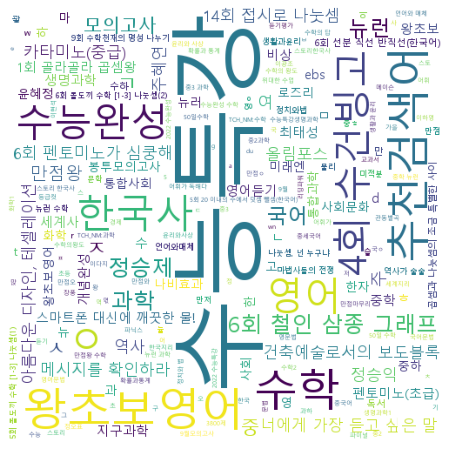

In [99]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white', width=500, height=500).generate_from_frequencies(result)

plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

In [51]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ') |
                     (wordCnt['검색어'] == 'd' )].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+1

In [52]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('주', 64)
2 위:  ('뉴', 37)
3 위:  ('마', 37)
4 위:  ('여', 36)
5 위:  ('수', 36)
6 위:  ('ㅇ', 36)
7 위:  ('고', 33)
8 위:  ('이', 28)
9 위:  ('중', 26)
10 위:  ('어', 24)
11 위:  ('추천검색어', 23)
12 위:  ('스', 22)
13 위:  ('ㅅ', 20)
14 위:  ('수능특강', 18)
15 위:  ('ㅈ', 18)
16 위:  ('오', 18)
17 위:  ('왕초보영어', 16)
18 위:  ('즈', 16)
19 위:  ('미', 15)
20 위:  ('수학', 13)
21 위:  ('ㅇㆍ', 13)
22 위:  ('ㅎ', 13)
23 위:  ('한국사', 13)
24 위:  ('ㅁ', 12)
25 위:  ('저', 12)
26 위:  ('누', 12)
27 위:  ('사', 11)
28 위:  ('기', 11)
29 위:  ('그', 11)
30 위:  ('구', 11)
31 위:  ('ㄱ', 11)
32 위:  ('정승제', 11)
33 위:  ('시', 10)
34 위:  ('세', 10)
35 위:  ('느', 10)
36 위:  ('만', 10)
37 위:  ('지', 10)
38 위:  ('과', 9)
39 위:  ('국', 9)
40 위:  ('수하', 9)
41 위:  ('수능완성', 9)
42 위:  ('dud', 9)
43 위:  ('4회 수건빙고', 8)
44 위:  ('뉴러', 8)
45 위:  ('무', 8)
46 위:  ('카타미노(중급)', 8)
47 위:  ('du', 8)
48 위:  ('영', 8)
49 위:  ('숳', 8)
50 위:  ('뉼', 7)


In [53]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ') |
                     (wordCnt['검색어'] == "d")].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+2

In [54]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('중', 41)
2 위:  ('ㅇ', 34)
3 위:  ('주', 33)
4 위:  ('만', 27)
5 위:  ('수학', 23)
6 위:  ('과', 23)
7 위:  ('ㅈ', 21)
8 위:  ('여', 20)
9 위:  ('뉴', 19)
10 위:  ('마', 19)
11 위:  ('국', 17)
12 위:  ('뉼', 17)
13 위:  ('고', 17)
14 위:  ('왕초보영어', 17)
15 위:  ('어', 17)
16 위:  ('수능특강', 17)
17 위:  ('한국사', 14)
18 위:  ('숳', 14)
19 위:  ('영', 13)
20 위:  ('ㅅ', 12)
21 위:  ('추천검색어', 12)
22 위:  ('수하', 11)
23 위:  ('뉴런', 11)
24 위:  ('구', 11)
25 위:  ('영어', 11)
26 위:  ('수', 11)
27 위:  ('뉴러', 10)
28 위:  ('기', 10)
29 위:  ('ㄱ', 9)
30 위:  ('스', 9)
31 위:  ('역사', 9)
32 위:  ('사', 9)
33 위:  ('ㅁ', 9)
34 위:  ('국어', 8)
35 위:  ('과학', 8)
36 위:  ('괗', 8)
37 위:  ('미', 8)
38 위:  ('ㅇㆍ', 8)
39 위:  ('정승제', 8)
40 위:  ('역', 7)
41 위:  ('개념완성', 7)
42 위:  ('정', 7)
43 위:  ('이', 7)
44 위:  ('즈', 7)
45 위:  ('올림포스', 6)
46 위:  ('누', 6)
47 위:  ('오', 6)
48 위:  ('히', 6)
49 위:  ('지', 6)
50 위:  ('d', 6)


In [59]:
#50위권내 오타나는 단어 찾아보기 (오타 : ㅇ, ㄱ, ㅈ, ㅅ, ㅁ, ㄴ )

typo = wordCnt.index[(wordCnt['검색어'] == 'ㅇ') | 
                     (wordCnt['검색어'] == 'ㄱ') |
                     (wordCnt['검색어'] == 'ㅈ') |
                     (wordCnt['검색어'] == 'ㅅ') |
                     (wordCnt['검색어'] == 'ㅁ') |
                     (wordCnt['검색어'] == 'ㄴ') |
                     (wordCnt['검색어'] == "d")].tolist() #인덱스 뽑기

for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo[i] = typo[i]+3

In [60]:
typoKeyword = wordCnt.loc[typo]["검색어"]

typoKeyword = Counter(typoKeyword)
result = dict(typoKeyword)
rank = sorted(result.items(),reverse=True,key=lambda item: item[1])
for i in range(50): #50위 까지만 확인
    print(i+1,"위: ",rank[i])

1 위:  ('여', 32)
2 위:  ('중', 27)
3 위:  ('수학', 25)
4 위:  ('ㅇ', 23)
5 위:  ('주', 21)
6 위:  ('뉴', 19)
7 위:  ('왕초보영어', 19)
8 위:  ('뉴런', 18)
9 위:  ('만', 18)
10 위:  ('추천검색어', 17)
11 위:  ('과', 14)
12 위:  ('영어', 14)
13 위:  ('수능특강', 13)
14 위:  ('뉴러', 13)
15 위:  ('한국사', 13)
16 위:  ('국어', 12)
17 위:  ('영어듣기', 12)
18 위:  ('수하', 11)
19 위:  ('영', 11)
20 위:  ('마', 11)
21 위:  ('ㄱ', 11)
22 위:  ('과학', 10)
23 위:  ('이', 10)
24 위:  ('ㅎ', 9)
25 위:  ('국', 8)
26 위:  ('괗', 8)
27 위:  ('정승제', 8)
28 위:  ('역사', 8)
29 위:  ('맍', 8)
30 위:  ('저', 8)
31 위:  ('4회 수건빙고', 8)
32 위:  ('숳', 8)
33 위:  ('중학', 7)
34 위:  ('국ㅇ', 7)
35 위:  ('중2', 7)
36 위:  ('고', 7)
37 위:  ('뉼', 7)
38 위:  ('만저', 7)
39 위:  ('어', 7)
40 위:  ('주혜연', 7)
41 위:  ('ㅅ', 7)
42 위:  ('수', 6)
43 위:  ('엯', 6)
44 위:  ('일', 6)
45 위:  ('미', 6)
46 위:  ('왕', 6)
47 위:  ('메시지를 확인하라', 6)
48 위:  ('역', 6)
49 위:  ('한자', 6)
50 위:  ('중3', 6)


In [ ]:
#"ㅇ만 확인"

typo = wordCnt.index[wordCnt['검색어'] == 'ㅇ'].tolist() #인덱스 뽑기
typo1 = []
typo2 = []
for i in range(len(typo)): #일반적으로 오타뒤에 원래 원하는 값(인덱스 +1)을 입력할 확률이 높으므로 뒤에 검색한 내용을 찾기
    typo1.append(typo[i]+1)
    typo2.append(typo[i]+2)
    
typoKeyword = wordCnt.loc[typo]
typo1 = wordCnt.loc[typo1]["검색어"]
typo2 = wordCnt.loc[typo2]["검색어"]

typoKeyword = typoKeyword.reset_index(drop = True)
typo1 = typo1.reset_index(drop = True)
typo2 = typo2.reset_index(drop = True)

typoKeyword["+1"] = typo1
typoKeyword["+2"] = typo2

typoKeyword = typoKeyword[["검색어","+1","+2"]]
typoKeyword[:30]